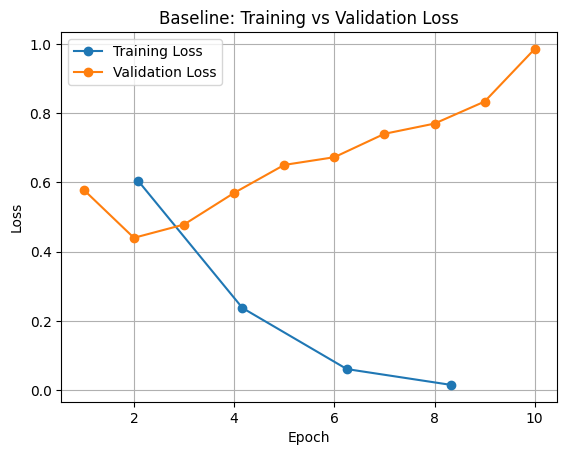

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("baseline_log.csv")

# Training loss: ambil yang punya 'loss'
train_loss = (
    df[df["loss"].notna()]
    .groupby("epoch")["loss"]
    .mean()
    .reset_index()
)

# Validation loss: ambil yang punya 'eval_loss'
val_loss = (
    df[df["eval_loss"].notna()]
    .groupby("epoch")["eval_loss"]
    .mean()
    .reset_index()
)

plt.figure()
plt.plot(train_loss["epoch"], train_loss["loss"], marker="o", label="Training Loss")
plt.plot(val_loss["epoch"], val_loss["eval_loss"], marker="o", label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Baseline: Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def extract_eval_metric(df, metric_name):
    return (
        df[df[metric_name].notna()]
        .groupby("epoch")[metric_name]
        .mean()
        .reset_index()
    )


In [ ]:
baseline = pd.read_csv("baseline_log.csv")
max512   = pd.read_csv("exp01_maxlen512_log.csv")
warmup   = pd.read_csv("exp02_warmup_linear_log.csv")

baseline_f1 = extract_eval_metric(baseline, "eval_f1_macro")
max512_f1   = extract_eval_metric(max512, "eval_f1_macro")
warmup_f1   = extract_eval_metric(warmup, "eval_f1_macro")

baseline_loss = extract_eval_metric(baseline, "eval_loss")
max512_loss   = extract_eval_metric(max512, "eval_loss")
warmup_loss   = extract_eval_metric(warmup, "eval_loss")


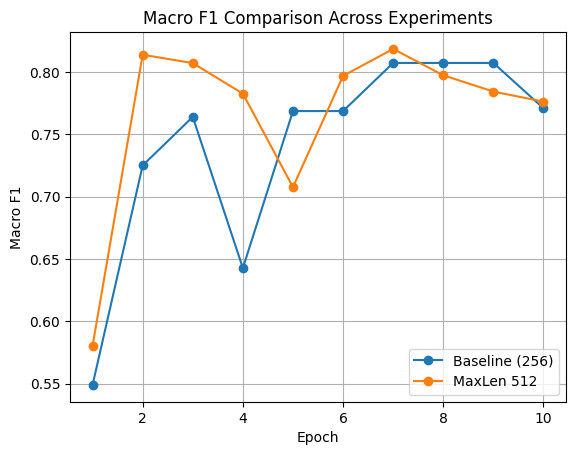

In [ ]:
plt.figure()
plt.plot(baseline_f1["epoch"], baseline_f1["eval_f1_macro"],
         marker="o", label="Baseline (256)")

plt.plot(max512_f1["epoch"], max512_f1["eval_f1_macro"],
         marker="o", label="MaxLen 512")



plt.xlabel("Epoch")
plt.ylabel("Macro F1")
plt.title("Macro F1 Comparison Across Experiments")
plt.legend()
plt.grid(True)
plt.show()


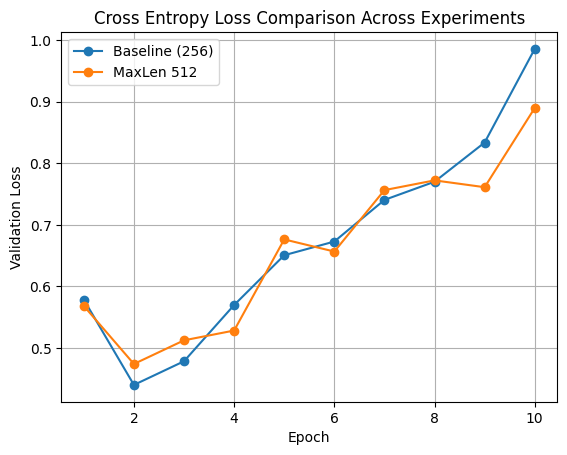

In [ ]:
plt.figure()
plt.plot(baseline_loss["epoch"], baseline_loss["eval_loss"],
         marker="o", label="Baseline (256)")

plt.plot(max512_loss["epoch"], max512_loss["eval_loss"],
         marker="o", label="MaxLen 512")



plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.title("Cross Entropy Loss Comparison Across Experiments")
plt.legend()
plt.grid(True)
plt.show()


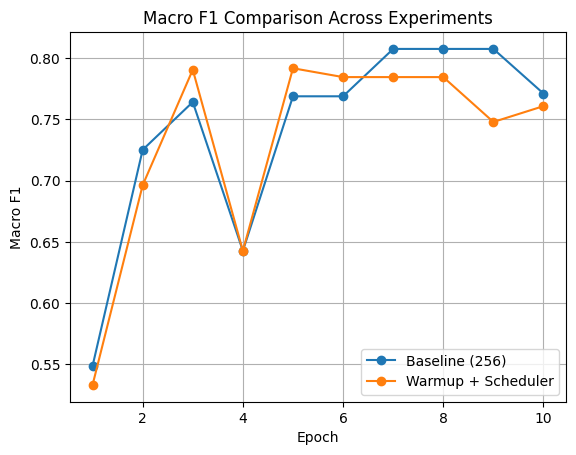

In [ ]:
plt.figure()
plt.plot(baseline_f1["epoch"], baseline_f1["eval_f1_macro"],
         marker="o", label="Baseline (256)")


plt.plot(warmup_f1["epoch"], warmup_f1["eval_f1_macro"],
         marker="o", label="Warmup + Scheduler")

plt.xlabel("Epoch")
plt.ylabel("Macro F1")
plt.title("Macro F1 Comparison Across Experiments")
plt.legend()
plt.grid(True)
plt.show()


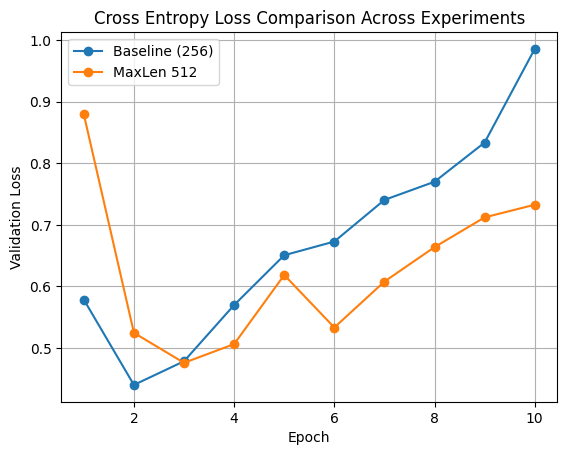

In [ ]:
plt.figure()
plt.plot(baseline_loss["epoch"], baseline_loss["eval_loss"],
         marker="o", label="Baseline (256)")

plt.plot(warmup_loss["epoch"], warmup_loss["eval_loss"],
         marker="o", label="MaxLen 512")



plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.title("Cross Entropy Loss Comparison Across Experiments")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
lr1 = pd.read_csv("exp03_lr_1e-05_log.csv")
lr2 = pd.read_csv("exp03_lr_2e-05_log.csv")
lr3 = pd.read_csv("exp03_lr_3e-05_log.csv")

lr1_f1 = extract_eval_metric(lr1, "eval_f1_macro")
lr2_f1 = extract_eval_metric(lr2, "eval_f1_macro")
lr3_f1 = extract_eval_metric(lr3, "eval_f1_macro")

lr1_loss = extract_eval_metric(lr1, "eval_loss")
lr2_loss = extract_eval_metric(lr2, "eval_loss")
lr3_loss = extract_eval_metric(lr3, "eval_loss")


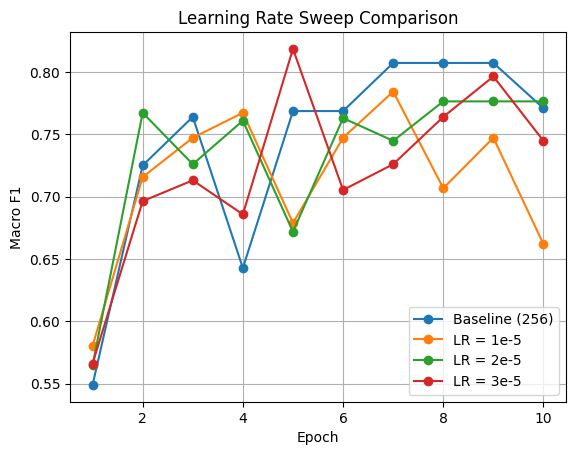

In [ ]:
plt.figure()
plt.plot(baseline_f1["epoch"], baseline_f1["eval_f1_macro"],
         marker="o", label="Baseline (256)")

plt.plot(lr1_f1["epoch"], lr1_f1["eval_f1_macro"],
         marker="o", label="LR = 1e-5")

plt.plot(lr2_f1["epoch"], lr2_f1["eval_f1_macro"],
         marker="o", label="LR = 2e-5")

plt.plot(lr3_f1["epoch"], lr3_f1["eval_f1_macro"],
         marker="o", label="LR = 3e-5")

plt.xlabel("Epoch")
plt.ylabel("Macro F1")
plt.title("Learning Rate Sweep Comparison")
plt.legend()
plt.grid(True)
plt.show()


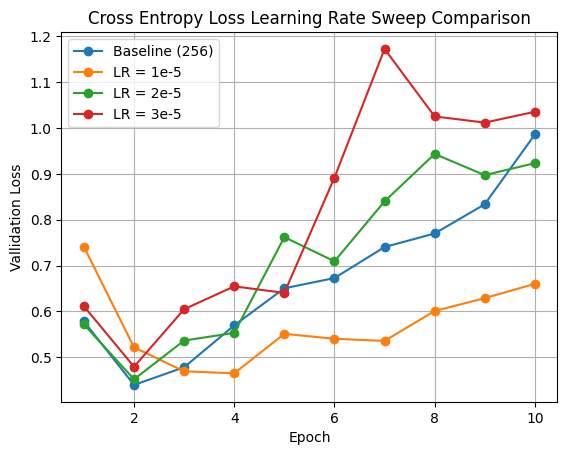

In [ ]:
plt.figure()
plt.plot(baseline_loss["epoch"], baseline_loss["eval_loss"],
         marker="o", label="Baseline (256)")

plt.plot(lr1_loss["epoch"], lr1_loss["eval_loss"],
         marker="o", label="LR = 1e-5")

plt.plot(lr2_loss["epoch"], lr2_loss["eval_loss"],
         marker="o", label="LR = 2e-5")

plt.plot(lr3_loss["epoch"], lr3_loss["eval_loss"],
         marker="o", label="LR = 3e-5")

plt.xlabel("Epoch")
plt.ylabel("Vallidation Loss")
plt.title("Cross Entropy Loss Learning Rate Sweep Comparison")
plt.legend()
plt.grid(True)
plt.show()


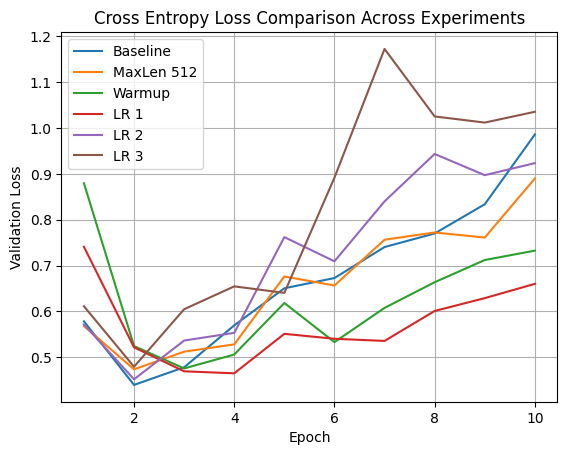

In [ ]:
baseline_vloss = extract_eval_metric(baseline, "eval_loss")
max512_vloss   = extract_eval_metric(max512, "eval_loss")
warmup_vloss   = extract_eval_metric(warmup, "eval_loss")
lr1_loss = extract_eval_metric(lr1, "eval_loss")
lr2_loss = extract_eval_metric(lr2, "eval_loss")
lr3_loss= extract_eval_metric(lr3, "eval_loss")

plt.figure()
plt.plot(baseline_vloss["epoch"], baseline_vloss["eval_loss"], label="Baseline")
plt.plot(max512_vloss["epoch"], max512_vloss["eval_loss"], label="MaxLen 512")
plt.plot(warmup_vloss["epoch"], warmup_vloss["eval_loss"], label="Warmup")
plt.plot(lr1_loss["epoch"], lr1_loss["eval_loss"], label="LR 1")
plt.plot(lr2_loss["epoch"], lr2_loss["eval_loss"], label="LR 2")
plt.plot(lr3_loss["epoch"], lr3_loss["eval_loss"], label="LR 3")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.title("Cross Entropy Loss Comparison Across Experiments")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

def best_val_f1_from_log(path):
    df = pd.read_csv(path)
    eval_df = (
        df[df["eval_f1_macro"].notna()]
        .groupby("epoch", as_index=False)["eval_f1_macro"]
        .mean()
    )
    best_row = eval_df.loc[eval_df["eval_f1_macro"].idxmax()]
    return float(best_row["epoch"]), float(best_row["eval_f1_macro"])


In [ ]:
import matplotlib.pyplot as plt

experiments = {
    "Baseline (256)": "baseline_log.csv",
    "MaxLen 512": "exp01_maxlen512_log.csv",
    "Warmup+Sched (256)": "exp02_warmup_linear_log.csv",
    "LR 1e-5 (256)": "exp03_lr_1e-05_log.csv",
    "LR 2e-5 (256)": "exp03_lr_2e-05_log.csv",
    "LR 3e-5 (256)": "exp03_lr_3e-05_log.csv",
}

rows = []
for name, path in experiments.items():
    best_epoch, best_f1 = best_val_f1_from_log(path)
    rows.append({"experiment": name, "best_epoch": best_epoch, "best_val_f1": best_f1})

summary = pd.DataFrame(rows).sort_values("best_val_f1", ascending=False)
summary


,experiment,best_epoch,best_val_f1
1,MaxLen 512,7.0,0.818713
5,LR 3e-5 (256),5.0,0.818713
0,Baseline (256),7.0,0.807456
2,Warmup+Sched (256),5.0,0.791685
3,LR 1e-5 (256),7.0,0.784472
4,LR 2e-5 (256),8.0,0.776577


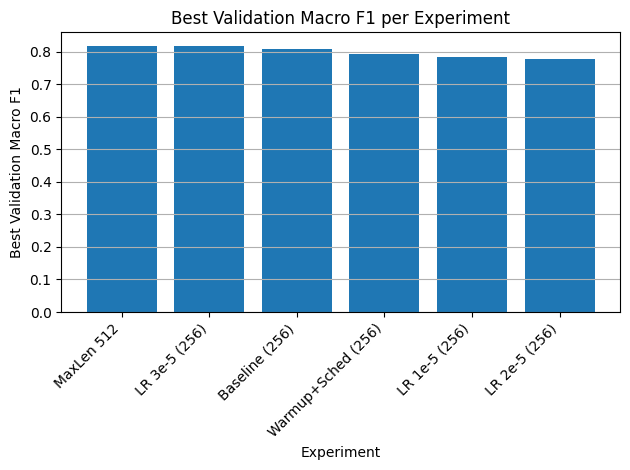

In [ ]:
plt.figure()
plt.bar(summary["experiment"], summary["best_val_f1"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Experiment")
plt.ylabel("Best Validation Macro F1")
plt.title("Best Validation Macro F1 per Experiment")
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()
